In [3]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/home/vanshika/Downloads/stock.csv')
#ds = pd.read_csv('/home/vanshika/Downloads/BAC.csv')
#dd = pd.read_csv('/home/vanshika/Downloads/EBAY.csv')
#print the head
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [153]:
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-20,29.76,29.840000,29.450001,29.480000,28.303865,81271200
1,2017-12-21,29.59,29.980000,29.580000,29.820000,28.630301,72953200
2,2017-12-22,29.98,30.030001,29.620001,29.879999,28.687906,54203000
3,2017-12-26,29.74,29.940001,29.580000,29.780001,28.591898,42371200
4,2017-12-27,29.66,29.730000,29.600000,29.730000,28.543890,35111800


In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

Using TensorFlow backend.
/home/vanshika/MLAI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vanshika/MLAI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vanshika/MLAI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vanshika/MLAI/lib/python3.7/site-packages/tensorflow/python

In [5]:
##############For prediction
ndata = dd.sort_index(ascending=True, axis=0)
new_ndata = pd.DataFrame(index=range(0,len(ds)),columns=['Date', 'Close'])
for i in range(0,len(ndata)):
    new_ndata['Date'][i] = ndata['Date'][i]
    new_ndata['Close'][i] = ndata['Close'][i]

NameError: name 'dd' is not defined

In [156]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

In [157]:
valid.shape

(248, 1)

In [158]:
#train

In [159]:
#############################
new_ndata.index = new_ndata.Date
new_ndata.drop('Date', axis=1, inplace=True)

#creating train and test sets
ndataset = new_ndata.values

ntrain = dataset[0:500,:]
nvalid = dataset[500:,:]

In [160]:
ntrain.shape

(500, 1)

In [161]:
caler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [162]:
#train
ndataset.shape
y_pred.shape

(440,)

In [163]:
###################
caler = MinMaxScaler(feature_range=(0, 1))
nscaled_data = scaler.fit_transform(ndataset)

x_pred, y_pred = [], []
for i in range(60,len(ntrain)):
    x_pred.append(nscaled_data[i-60:i,0])
    y_pred.append(nscaled_data[i,0])
x_pred, y_pred = np.array(x_pred), np.array(y_pred)

x_pred = np.reshape(x_pred, (x_pred.shape[0],x_pred.shape[1],1))

In [164]:
X_test.shape
x_pred.shape

(440, 60, 1)

In [165]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 22s - loss: 0.0040


In [166]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [167]:
X_test.shape

(248, 60, 1)

In [168]:
X_test.shape

(248, 60, 1)

In [122]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

84.72702305404468

/home/vanshika/MLAI/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


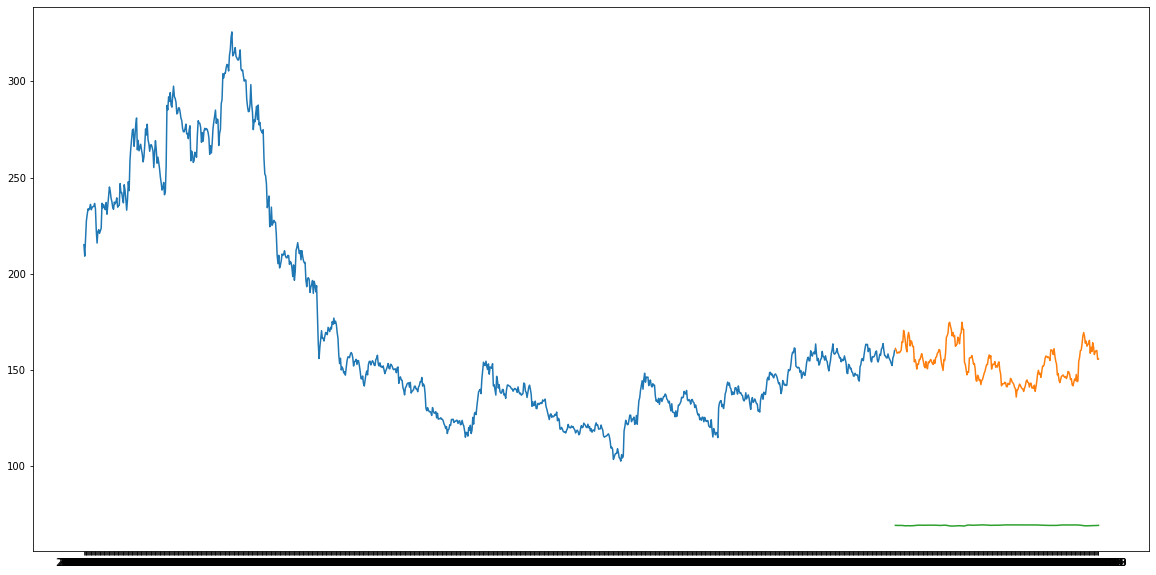

In [123]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [82]:
#train

In [81]:
#train

In [147]:
close_price = model.predict(x_pred)
close_price = scaler.inverse_transform(close_price)

In [151]:
close_price

array([[46.5029  ],
       [46.27145 ],
       [46.017834],
       [45.640102],
       [45.135254],
       [44.78979 ],
       [44.443867],
       [44.127914],
       [43.877224],
       [43.572582],
       [43.31212 ],
       [43.120922],
       [43.0145  ],
       [42.8429  ],
       [42.638233],
       [42.528313],
       [42.502537],
       [42.61118 ],
       [42.695408],
       [42.80313 ],
       [42.963634],
       [43.277332],
       [43.676907],
       [44.09214 ],
       [44.398056],
       [44.568363],
       [44.626625],
       [44.32612 ],
       [43.83274 ],
       [43.24298 ],
       [42.65446 ],
       [42.039913],
       [41.53539 ],
       [41.17762 ],
       [40.90475 ],
       [40.74471 ],
       [40.67549 ],
       [40.696007],
       [40.73223 ],
       [40.79363 ],
       [40.823875],
       [40.87194 ],
       [40.928955],
       [40.975143],
       [41.00827 ],
       [40.966423],
       [40.926994],
       [40.858215],
       [40.80115 ],
       [40.70288 ],


In [149]:
ptrain.shape

(440, 2)

/home/vanshika/MLAI/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


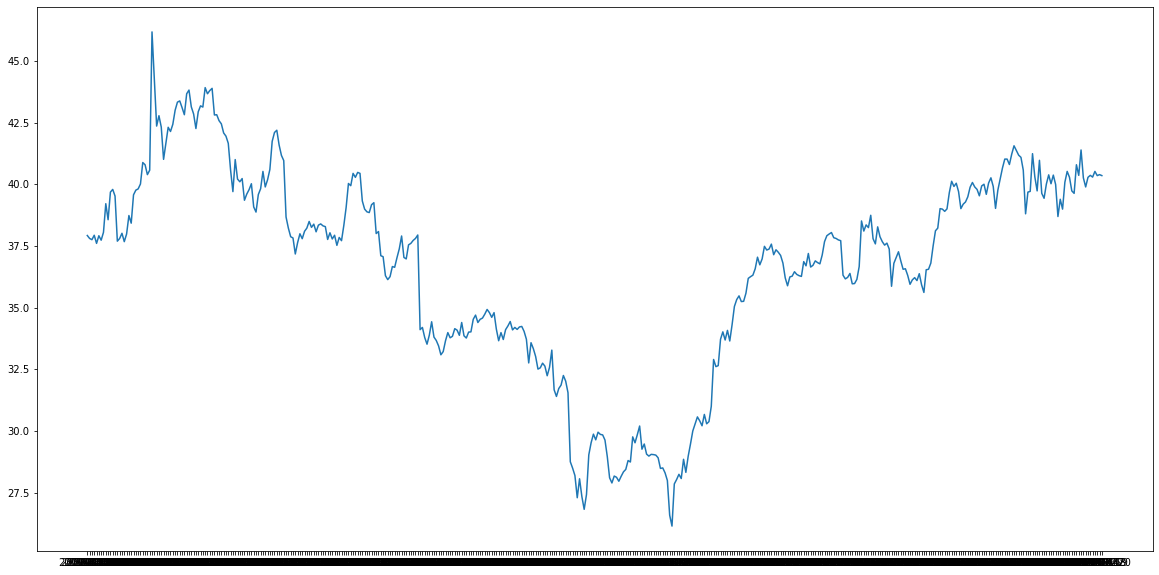

In [150]:
ptrain = new_ndata[:440]
#valid = new_data[987:]
ptrain['Predictions'] = close_price
plt.plot(ptrain['Close'])
#plt.plot(valid[['Close','Predictions']])

In [129]:
ptrain.shape

(504, 1)